In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read(folder, nodes):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, nodes, t0=t0)
        _paths_pgo, t0 = read_paths(output_folder, nodes, prefix="pgo_", t0=t0)
        paths[i] = _paths[i]
        paths_pgo[i] = _paths_pgo[i]
    return paths, paths_pgo, t0

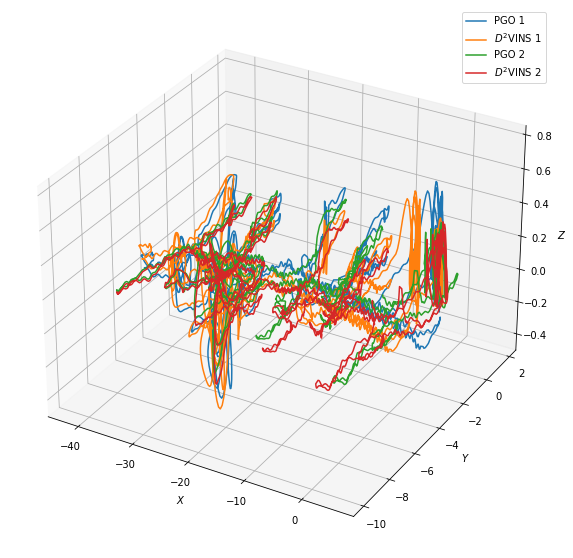

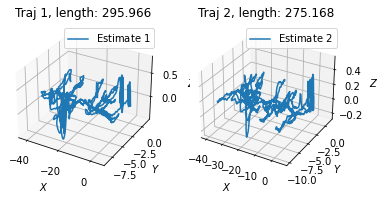

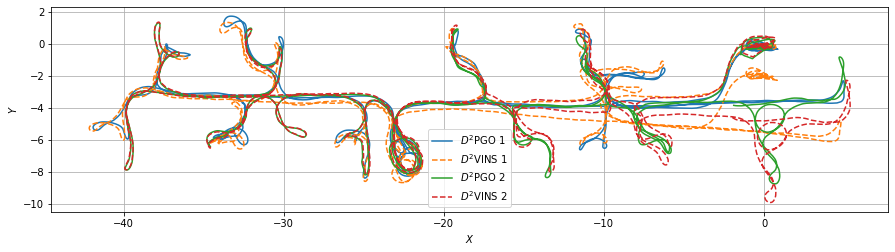

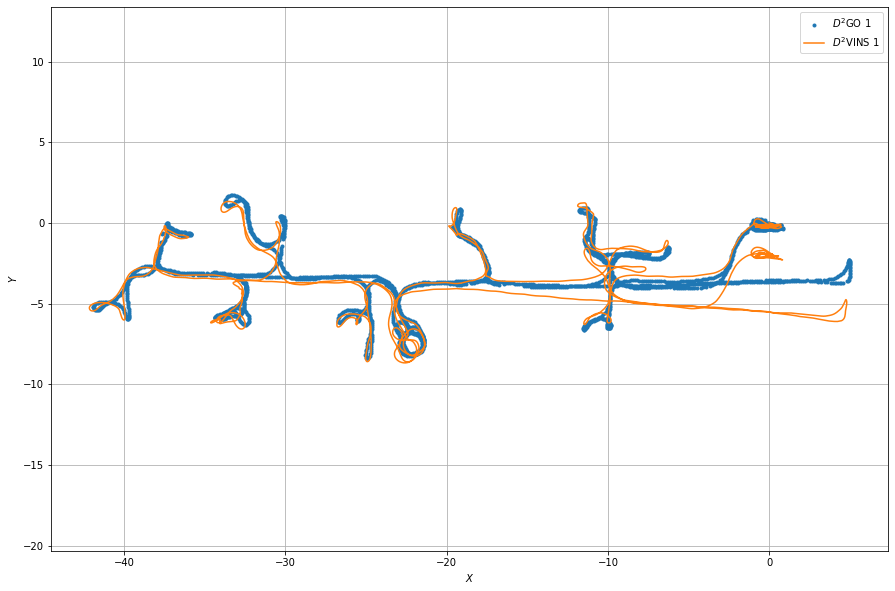

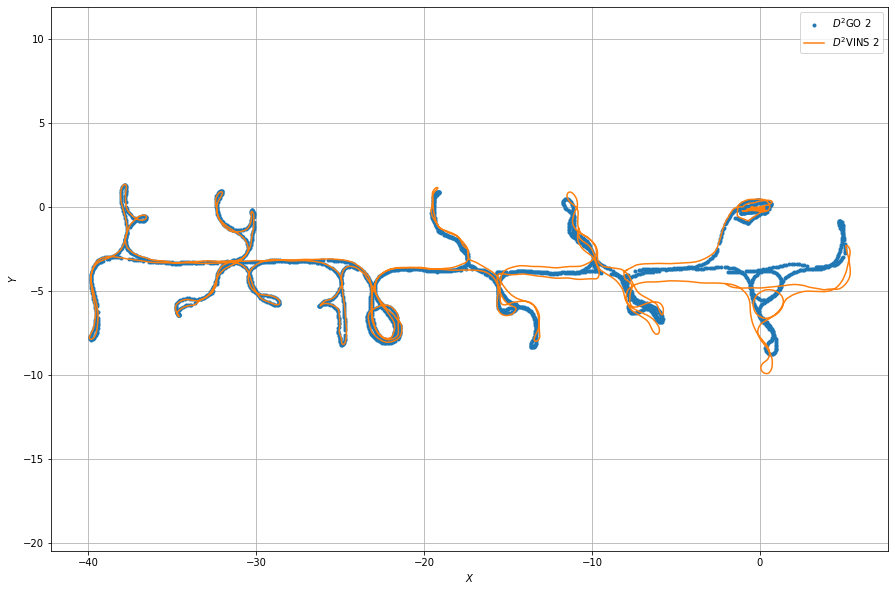

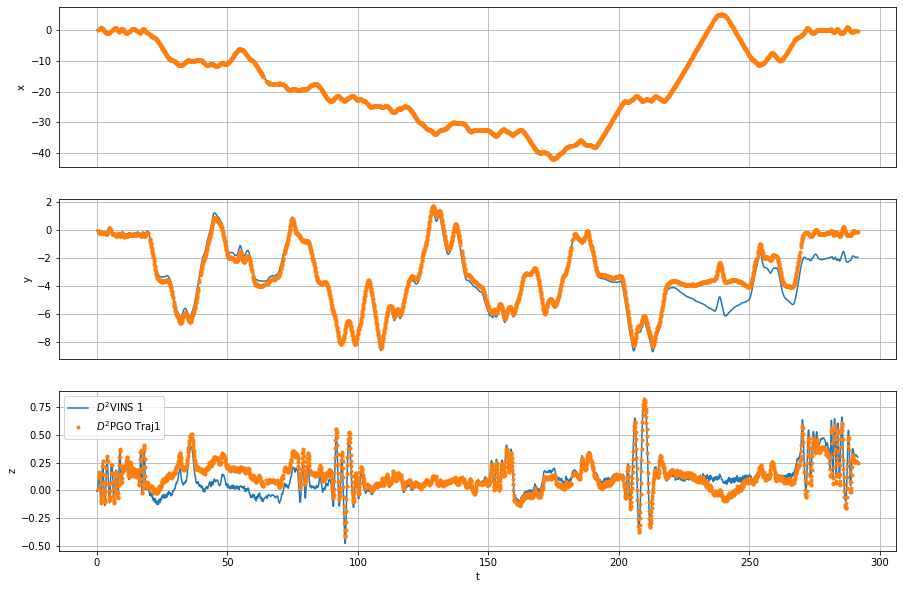

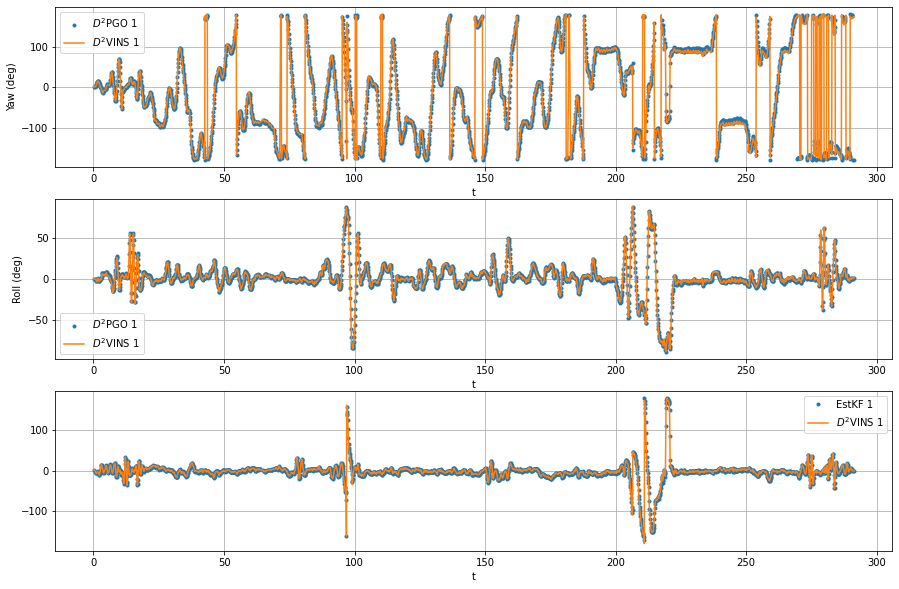

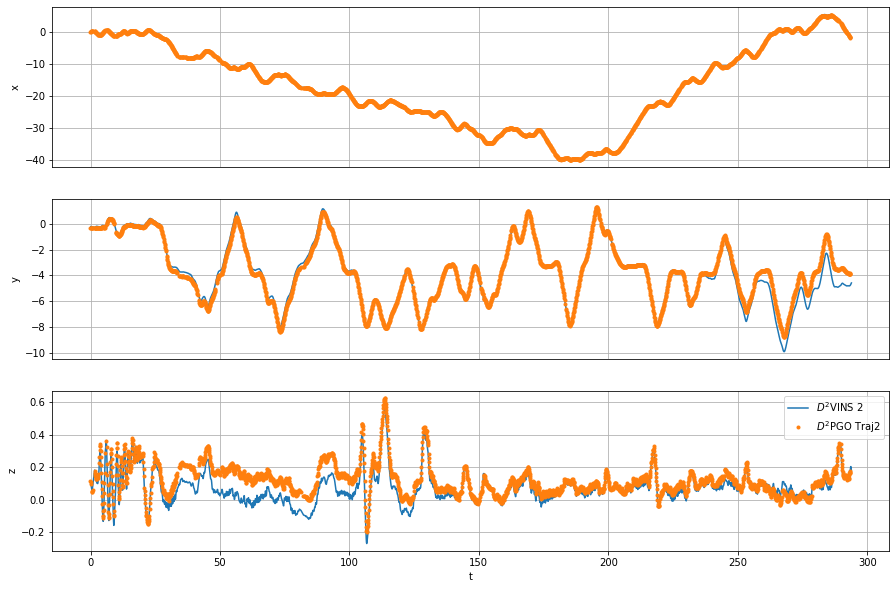

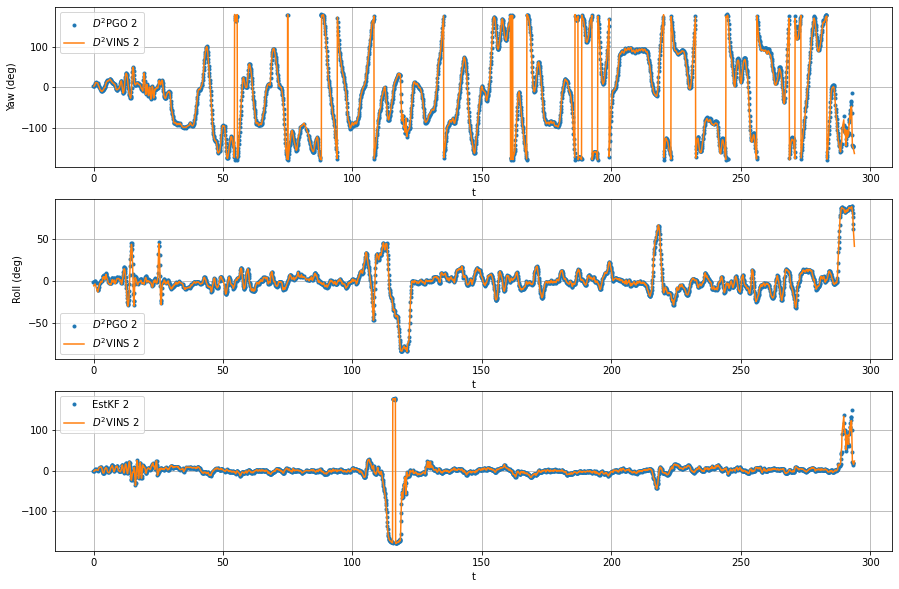

In [20]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/tum_corr/outputs/d2slam/swarm"
data_folder="/home/xuhao/data/d2slam/tum_corr/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="groundtruth")
paths, paths_pgo = read(output_folder, nodes)

plot_fused(nodes, paths, None, poses_pgo=paths_pgo, figsize=(15,10))



Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1,297.2m,1.429,3.373,2.2e-03,1.6e-03,1.7e-04,1.70e-02,0.491,1.984°
Avg.,297.2,1.429,3.37,,,,,0.491,1.98


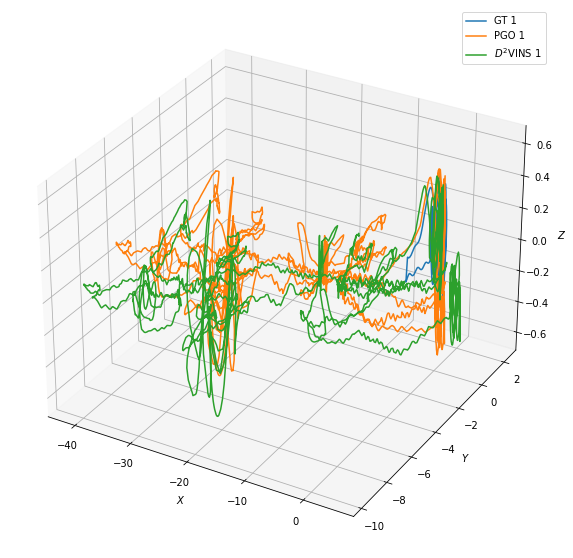

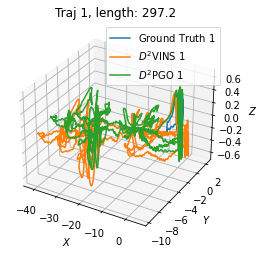

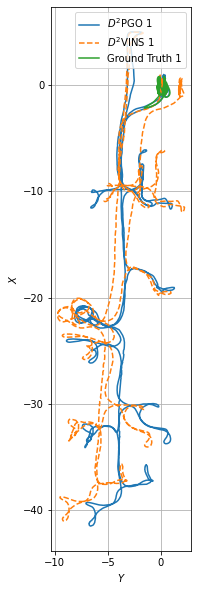

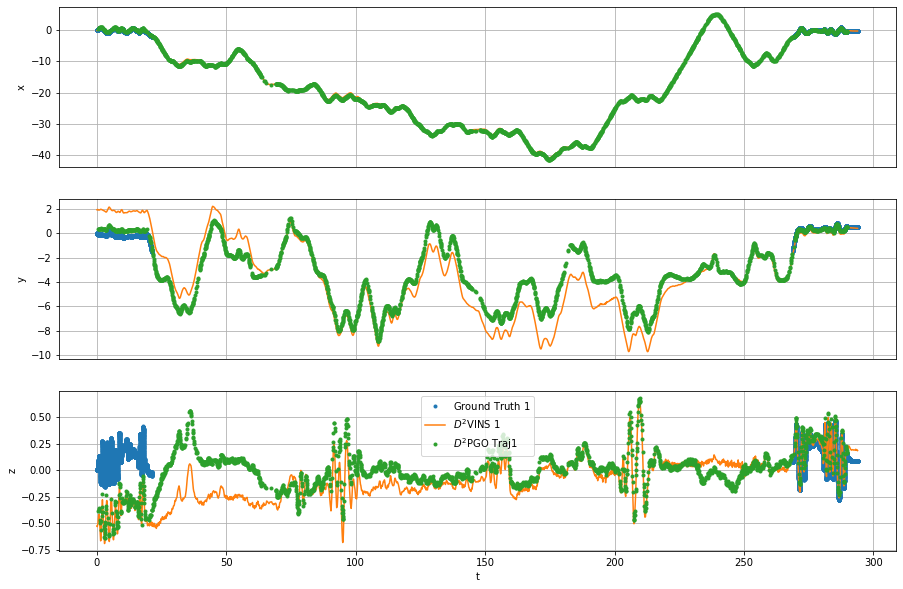

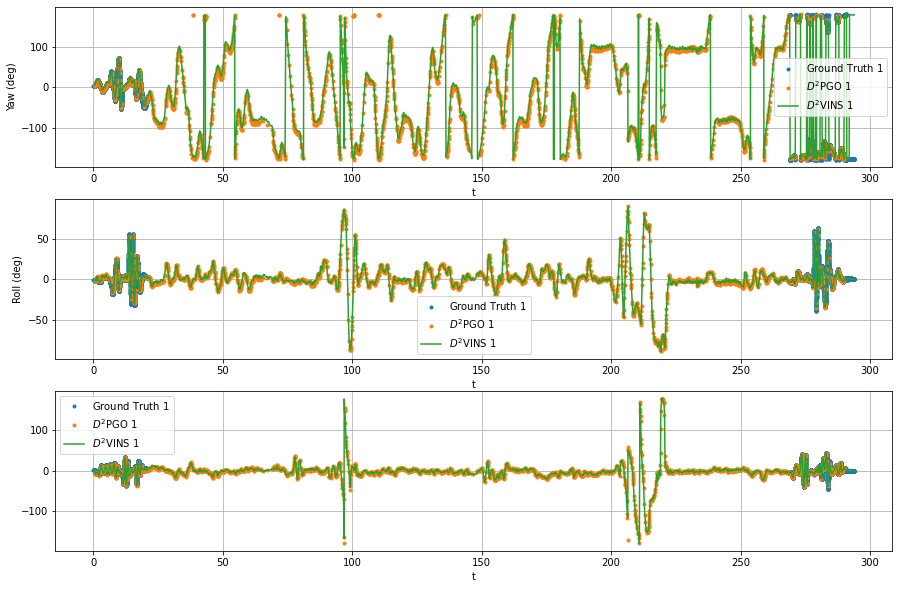

In [2]:
nodes = [1]
output_folder = "/home/xuhao/data/d2slam/tum_corr/outputs/d2slam/swarm"
data_folder="/home/xuhao/data/d2slam/tum_corr/"
dte = 550
paths, paths_pgo, t0 = read(output_folder, nodes)
paths_gt, t0 = read_paths(data_folder, nodes, prefix="groundtruth_", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True, align_coor_only=False)
align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True, align_coor_only=False)

display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
# display(relative_pose_err(nodes, paths, paths_gt, dte=dte))

plot_fused(nodes, paths, paths_gt, poses_pgo=paths_pgo, figsize=(15,10))